# Creating .csv files for training-test data split
## The goal is to have 4 different datasets: totally randomized trainig set, totally randomized test set, trainig and test sets split in a way that frames from one movie are not shared in both sets

In [1]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'..\files\data.tsv', sep="\t")

df.head()

,Unnamed: 0,path,genre,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Thriller
0,0,frames\Action\06Its9LhIHQ\1196.jpg,['Action'],1,0,0,0,0,0,0,0
1,1,frames\Action\06Its9LhIHQ\1426.jpg,['Action'],1,0,0,0,0,0,0,0
2,2,frames\Action\06Its9LhIHQ\1656.jpg,['Action'],1,0,0,0,0,0,0,0
3,3,frames\Action\06Its9LhIHQ\1886.jpg,['Action'],1,0,0,0,0,0,0,0
4,4,frames\Action\06Its9LhIHQ\2116.jpg,['Action'],1,0,0,0,0,0,0,0


### Create function that shows the genre distribution for the df to have similar distribution in training and test set

In [3]:
def get_genre_distribution(df) -> dict:
    
    existing_genres = {}

    # Loop over subfolders in the parent folder
    for index, row in df.iterrows():
        
        genre = '_'.join(ast.literal_eval(row['genre']))
            
        if genre not in existing_genres:
            existing_genres[genre] = 1
        else:
            existing_genres[genre] += 1


    existing_genres = dict(sorted(existing_genres.items(), key=lambda x:x[1], reverse=True))
    
    
    single_genre_list = []

    for gen in existing_genres.keys():
        
        gen_list = gen.split('_')
        
        for g in gen_list:
            
            if g not in single_genre_list:
                single_genre_list.append(g)
    
                
    existing_single_genres = {}

    for gen in single_genre_list:
        
        if gen not in existing_single_genres:
            existing_single_genres[gen] = 0
        
        for g in existing_genres:
            
            if gen in g:
                existing_single_genres[gen] += existing_genres[g]
                
    existing_single_genres = dict(sorted(existing_single_genres.items(), key=lambda x:x[1], reverse=True))
                
    plt.figure(figsize = (10, 5))

    plt.bar(existing_single_genres.keys(), existing_single_genres.values())
    
    plt.xlabel("Genres")
    plt.ylabel("Occurrence")
    plt.title("Occurence of genres")
                
    return existing_single_genres

{'Drama': 17729,
 'Comedy': 16126,
 'Action': 12526,
 'Adventure': 12249,
 'Horror': 5747,
 'Crime': 4551,
 'Thriller': 4121,
 'Romance': 3993}

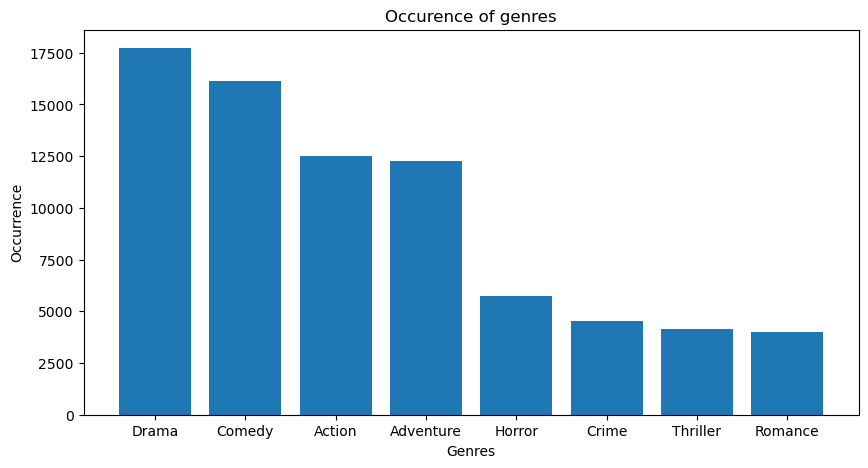

In [4]:
get_genre_distribution(df)

### Create train-test split for the first experiment

In [5]:
df = df.sample(frac=1).reset_index(drop=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df_train_random, df_test_random = train_test_split(df, test_size=0.15)

df_train_random = df_train_random.reset_index(drop=True)
df_test_random = df_test_random.reset_index(drop=True)

38968


,path,genre,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Thriller
0,frames\Crime_Drama\Mfcqb8DD400\3036.jpg,"['Crime', 'Drama']",0,0,0,1,1,0,0,0
1,frames\Comedy\kTk2jXiuo9s\276.jpg,['Comedy'],0,0,1,0,0,0,0,0
2,frames\Action_Drama\bNFWITNVAKU\1426.jpg,"['Action', 'Drama']",1,0,0,0,1,0,0,0
3,frames\Drama_Romance\j-v6XtJFNQE\1886.jpg,"['Drama', 'Romance']",0,0,0,0,1,0,1,0
4,frames\Action_Adventure\gAKiWvjfCiQ\1196.jpg,"['Action', 'Adventure']",1,1,0,0,0,0,0,0


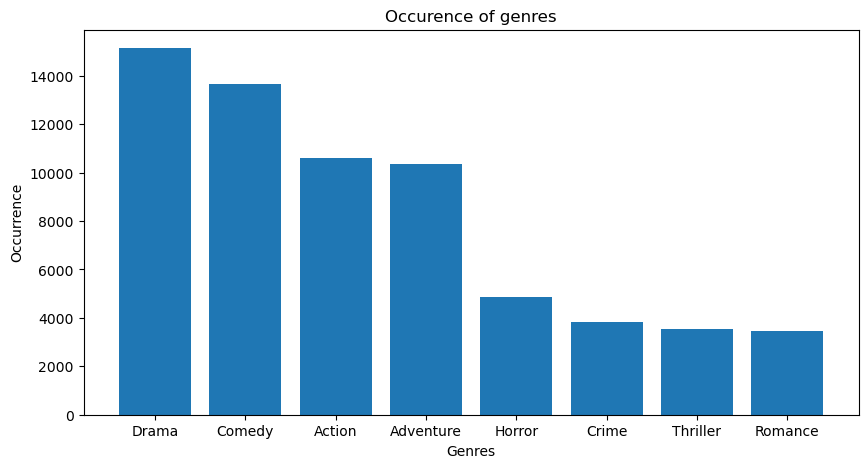

In [6]:
# Check the distribution of a training set

print(len(df_train_random))
get_genre_distribution(df_train_random)

df_train_random.head()

6877


,path,genre,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Thriller
0,frames\Action_Drama\g3D2eGiLoeI\1196.jpg,"['Action', 'Drama']",1,0,0,0,1,0,0,0
1,frames\Comedy_Horror\alh8b1lYuRU\3266.jpg,"['Comedy', 'Horror']",0,0,1,0,0,1,0,0
2,frames\Crime_Drama\S5x3QGlo22M\46.jpg,"['Crime', 'Drama']",0,0,0,1,1,0,0,0
3,frames\Action_Thriller\StnmzjqMKRo\2346.jpg,"['Action', 'Thriller']",1,0,0,0,0,0,0,1
4,frames\Comedy_Drama\ES496lmmGcM\966.jpg,"['Comedy', 'Drama']",0,0,1,0,1,0,0,0


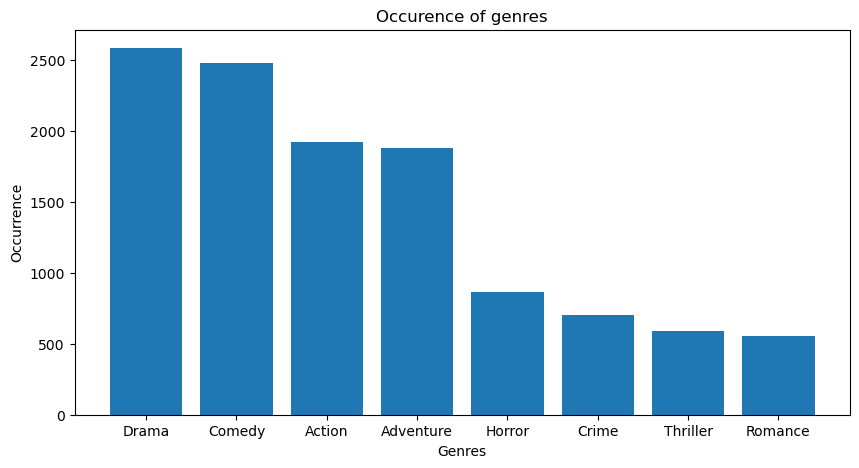

In [7]:
# Check the distribution of a test set

print(len(df_test_random))
get_genre_distribution(df_test_random)

df_test_random.head()

In [8]:
# If the distribution is similar - save new .tsv files

df_train_random.to_csv(r'..\files\data_train_random.tsv', sep="\t")
df_test_random.to_csv(r'..\files\data_test_random.tsv', sep="\t")

### Create train-test split for the second experiment

In [9]:
# Add a column with the path of the movie folder but without the .jpg files

df['path_no_file'] = df.apply(lambda row: row['path'][:row['path'].rfind("\\")], axis=1)

df = df[[df.columns[-1]] + df.columns[:-1].tolist()]

# Get the pandas series with separate movie paths to later merge them with the previous table

df_path_no_file = df['path_no_file'].drop_duplicates()

len(df_path_no_file)


3767

In [10]:
# Split the pandas series

df_path_no_file = df_path_no_file.sample(frac=1).reset_index(drop=True)

df_path_no_file_train_separate_movies, df_path_no_file_test_separate_movies = train_test_split(df_path_no_file, test_size=0.15)

df_path_no_file_train_separate_movies = df_path_no_file_train_separate_movies.reset_index(drop=True)
df_path_no_file_test_separate_movies = df_path_no_file_test_separate_movies.reset_index(drop=True)


38958


,path,genre,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Thriller
0,frames\Action_Adventure\vUrgn1Vm86I\966.jpg,"['Action', 'Adventure']",1,1,0,0,0,0,0,0
1,frames\Action_Adventure\vUrgn1Vm86I\506.jpg,"['Action', 'Adventure']",1,1,0,0,0,0,0,0
2,frames\Action_Adventure\vUrgn1Vm86I\1886.jpg,"['Action', 'Adventure']",1,1,0,0,0,0,0,0
3,frames\Action_Adventure\vUrgn1Vm86I\1196.jpg,"['Action', 'Adventure']",1,1,0,0,0,0,0,0
4,frames\Action_Adventure\vUrgn1Vm86I\276.jpg,"['Action', 'Adventure']",1,1,0,0,0,0,0,0


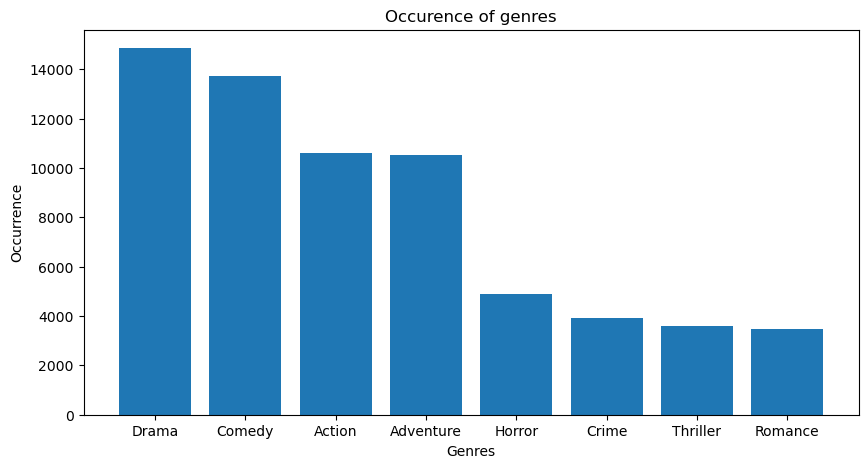

In [11]:
# Merge tables and check the distribution of a training set

df_train_separate_movies = pd.merge(df, df_path_no_file_train_separate_movies, on='path_no_file', how='inner')

df_train_separate_movies = df_train_separate_movies[df_train_separate_movies.columns.tolist()[1:]]

print(len(df_train_separate_movies))
get_genre_distribution(df_train_separate_movies)

df_train_separate_movies.head()

6887


,path,genre,Action,Adventure,Comedy,Crime,Drama,Horror,Romance,Thriller
0,frames\Drama\ZNnk9L2LSZI\1426.jpg,['Drama'],0,0,0,0,1,0,0,0
1,frames\Drama\ZNnk9L2LSZI\3036.jpg,['Drama'],0,0,0,0,1,0,0,0
2,frames\Drama\ZNnk9L2LSZI\46.jpg,['Drama'],0,0,0,0,1,0,0,0
3,frames\Drama\ZNnk9L2LSZI\3266.jpg,['Drama'],0,0,0,0,1,0,0,0
4,frames\Drama\ZNnk9L2LSZI\736.jpg,['Drama'],0,0,0,0,1,0,0,0


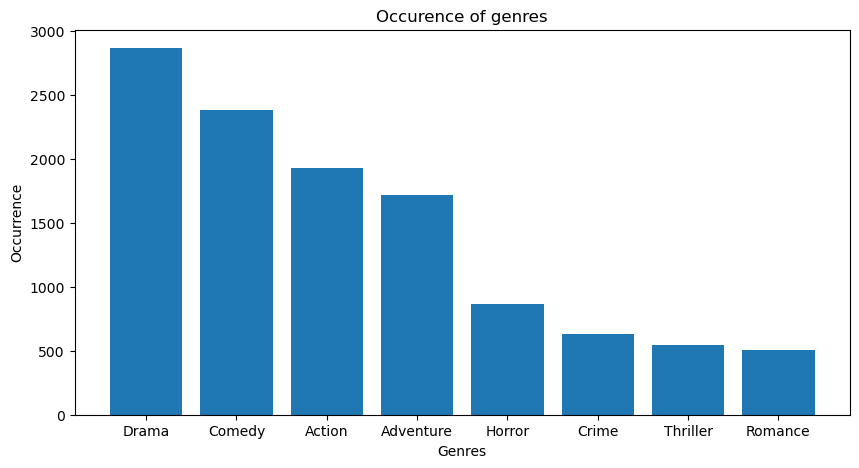

In [12]:
# Merge tables and check the distribution of a test set

df_test_separate_movies = pd.merge(df, df_path_no_file_test_separate_movies, on='path_no_file', how='inner')

df_test_separate_movies = df_test_separate_movies[df_test_separate_movies.columns.tolist()[1:]]

print(len(df_test_separate_movies))
get_genre_distribution(df_test_separate_movies)

df_test_separate_movies.head()

In [13]:
# If the distribution is similar - save new .tsv files

df_train_separate_movies.to_csv(r'..\files\data_train_separate_movies.tsv', sep="\t")
df_test_separate_movies.to_csv(r'..\files\data_test_separate_movies.tsv', sep="\t")

In [14]:
# Plot the distribution on one figure
data_df = pd.read_csv(r'..\files\data.tsv', sep="\t")
data_train_random_df = pd.read_csv(r'..\files\data_train_random.tsv', sep="\t")
data_test_random_df = pd.read_csv(r'..\files\data_test_random.tsv', sep="\t")
data_train_separate_movies_df = pd.read_csv(r'..\files\data_train_separate_movies.tsv', sep="\t")
data_test_separate_movies_df = pd.read_csv(r'..\files\data_test_separate_movies.tsv', sep="\t")

In [15]:
def get_genre_distribution_no_plot(df) -> dict:
    
    existing_genres = {}

    # Loop over subfolders in the parent folder
    for index, row in df.iterrows():
        
        genre = '_'.join(ast.literal_eval(row['genre']))
            
        if genre not in existing_genres:
            existing_genres[genre] = 1
        else:
            existing_genres[genre] += 1


    existing_genres = dict(sorted(existing_genres.items(), key=lambda x:x[1], reverse=True))
    
    
    single_genre_list = []

    for gen in existing_genres.keys():
        
        gen_list = gen.split('_')
        
        for g in gen_list:
            
            if g not in single_genre_list:
                single_genre_list.append(g)
    
                
    existing_single_genres = {}

    for gen in single_genre_list:
        
        if gen not in existing_single_genres:
            existing_single_genres[gen] = 0
        
        for g in existing_genres:
            
            if gen in g:
                existing_single_genres[gen] += existing_genres[g]
                
    existing_single_genres = dict(sorted(existing_single_genres.items(), key=lambda x:x[1], reverse=True))

    return existing_single_genres


def normalize_dict(data_dict):
    norm_dict = {}

    for key in data_dict:
        norm_value = float(data_dict[key])/max(data_dict.values())
        norm_dict[key] = norm_value

    return norm_dict

In [16]:
data_genres = get_genre_distribution_no_plot(data_df)
data_train_random_genres = get_genre_distribution_no_plot(data_train_random_df)
data_test_random_genres = get_genre_distribution_no_plot(data_test_random_df)
data_train_separate_movies_genres = get_genre_distribution_no_plot(data_train_separate_movies_df)
data_test_separate_movies_genres = get_genre_distribution_no_plot(data_test_separate_movies_df)

In [17]:
data_genres

{'Drama': 17729,
 'Comedy': 16126,
 'Action': 12526,
 'Adventure': 12249,
 'Horror': 5747,
 'Crime': 4551,
 'Thriller': 4121,
 'Romance': 3993}

In [18]:
data_genres_norm = normalize_dict(data_genres)
data_train_random_genres_norm = normalize_dict(data_train_random_genres)
data_test_random_genres_norm = normalize_dict(data_test_random_genres)
data_train_separate_movies_genres_norm = normalize_dict(data_train_separate_movies_genres)
data_test_separate_movies_genres_norm = normalize_dict(data_test_separate_movies_genres)

In [19]:
data_genres_norm = dict(sorted(data_genres_norm.items(), key=lambda x:x[1], reverse=False))
data_train_random_genres_norm = dict(sorted(data_train_random_genres_norm.items(), key=lambda x:x[1], reverse=False))
data_test_random_genres_norm = dict(sorted(data_test_random_genres_norm.items(), key=lambda x:x[1], reverse=False))
data_train_separate_movies_genres_norm = dict(sorted(data_train_separate_movies_genres_norm.items(), key=lambda x:x[1], reverse=False))
data_test_separate_movies_genres_norm = dict(sorted(data_test_separate_movies_genres_norm.items(), key=lambda x:x[1], reverse=False))

Text(0.5, 1.0, 'Occurence of different genres among datasets')

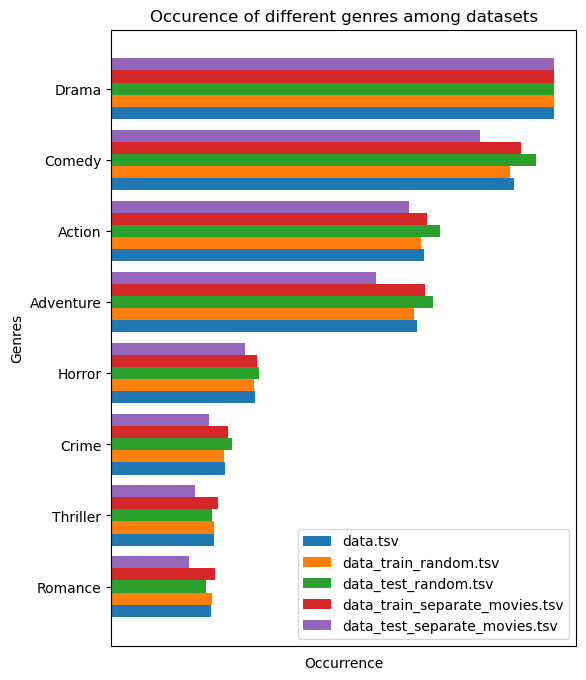

In [20]:
import numpy as np

ind = np.arange(len(data_genres_norm))
width = 0.17


fig, ax = plt.subplots(figsize=(6, 8))
ax.barh(ind - 1*width, data_genres_norm.values(), width, label='data.tsv')
ax.barh(ind, data_train_random_genres_norm.values(), width, label='data_train_random.tsv')
ax.barh(ind + width, data_test_random_genres_norm.values(), width, label='data_test_random.tsv')
ax.barh(ind + 2*width, data_train_separate_movies_genres_norm.values(), width, label='data_train_separate_movies.tsv')
ax.barh(ind + 3*width, data_test_separate_movies_genres_norm.values(), width, label='data_test_separate_movies.tsv')

ax.set(yticks=ind + width, yticklabels=data_genres_norm.keys(), xticklabels=[], ylim=[2*width - 1, len(data_genres_norm)])
ax.set_xticks([])
ax.legend()

ax.set_ylabel("Genres")
ax.set_xlabel("Occurrence")
ax.set_title("Occurence of different genres among datasets")
